# Week 12 Hand-in

## Assignment


https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/12Exercise.ipynb

## Status


completed mandatory excercises

# Imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Solution for ex 1

Image shape (2400, 3000, 3) Thresh (2400, 3000) [  0 254 255]


<Figure size 432x288 with 0 Axes>

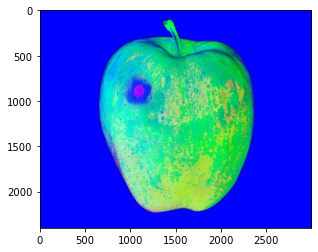

<Figure size 432x288 with 0 Axes>

In [14]:
image_path = './week12/apple.png'
image = cv2.imread(image_path)
plt.imshow(image)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img_hsv.copy()
##Finding contours
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

<Figure size 432x288 with 0 Axes>

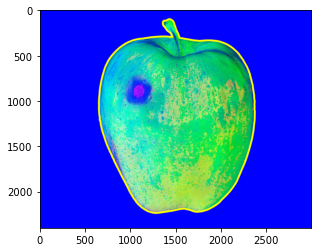

<Figure size 432x288 with 0 Axes>

In [15]:
im1 = img_hsv.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(255,255,0),thickness=20)
plt.imshow(im1)
plt.figure()

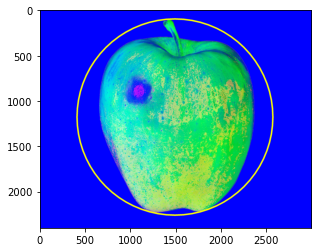

In [16]:
#drawing with center as contour center
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle (contour)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    draw_img = img_hsv.copy()
    cv2.circle(draw_img,(int(x),int(y)), radius=int(radius), color=(255,255,0), thickness=15) # negative thickness makes circle filled
plt.imshow(draw_img)

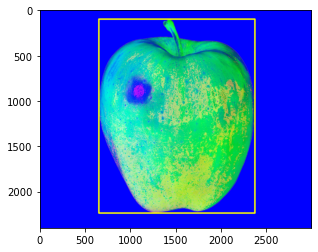

In [17]:
#drawing square that holds apple
for contour in contours:
    (x, y, j, k) = cv2.boundingRect(contour)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    draw_img = img_hsv.copy()
    #cv2.circle(draw_img,(int(x),int(y)), radius=int(radius), color=(255,255,0), thickness=15) # negative thickness makes circle filled
    cv2.rectangle(draw_img,(x,y),(x+j,y+k),color= (255,255,0), thickness = 15)
plt.imshow(draw_img)

Image shape (432, 1416, 3) Thresh (432, 1416) [  0 254 255]
There are 3 apples


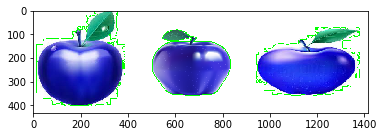

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img2 = cv2.imread('./week12/apples.png', 1)

# convert the image to HSV color space
img_hsv2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv2[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv2[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv2.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated2 = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img2.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img2.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} apples')